In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MNIST

## data augmentation

## split data into train and validation

## Converlutional Neural Network

In [9]:
import torch

In [10]:
# Load the data
data = pd.read_csv('train-minst.csv')
# data = pd.read_csv('test-minst.csv') # only for architecture building
label = data['label']
data = data.values[:, 1:]
data = data.reshape(data.shape[0], 28, 28)


1


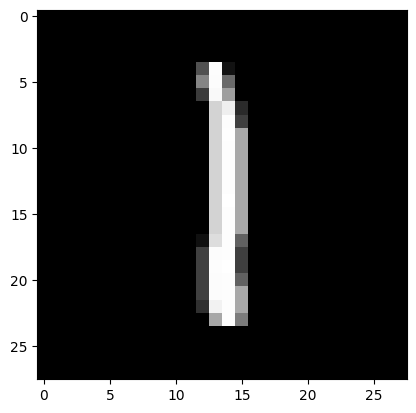

In [11]:
n = 1000
plt.imshow(data[n], cmap='gray')
print(label[n])

## cross validation

## Loss function

In [12]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = torch.nn.Linear(32*7*7, 128)
        self.fc2 = torch.nn.Linear(128, 10)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 32*7*7)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
# Net = CNN()
# criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(Net.parameters(), lr=0.001)

# data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)
# label = torch.tensor(label, dtype=torch.long)

# for epoch in range(10):
#     optimizer.zero_grad()
#     output = Net(data)
#     loss = criterion(output, label)
#     loss.backward()
#     optimizer.step()
#     print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

# Save the model
# torch.save(Net.state_dict(), 'model.pth')

# Load the model
Net = CNN()
Net.load_state_dict(torch.load('model.pth'))

# Test the model
data = pd.read_csv('train-minst.csv')
data = data.values[:, 1:]
data = data.reshape(data.shape[0], 28, 28)
data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)

output = Net(data)
output = torch.argmax(output, dim=1)
output = output.numpy()

df = pd.DataFrame(output, columns=['label'])
df.index.name = 'id'
df.to_csv('output.csv')


/var/folders/10/l11cj2dx0452qm5q2t184j3m0000gn/T/ipykernel_82960/3894381492.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Net.load_state_dict(torch.load('model.pth'))

In [ ]:
data = pd.read_csv('train-minst.csv')
data = data.values[:, 0]
# 合并两个数组
data = np.vstack((data, output))

[[1 0 1 ... 7 6 9]
 [4 0 1 ... 7 6 9]]


In [17]:
with open('comp.csv', 'w') as f:
    f.write('true,pred\n')
    for i in range(data.shape[1]):
        f.write('{},{}\n'.format(data[0, i], data[1, i]))

## PCA